<a href="https://colab.research.google.com/github/x23425237/DeepLearning_GenAI/blob/main/textClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN-Based Text Classification Model:**

Input: Raw text data (e.g., product descriptions).

Step 1: Text is processed and tokenized.

Step 2: The tokenized words are converted into dense vectors (via the embedding layer).

Step 3: Convolutional filters detect patterns in the sequence of words.

Step 4: Max pooling reduces dimensionality, keeping the most important features.

Step 5: The output of pooling is passed through dense layers to make final predictions.

Step 6: The output layer assigns a probability to each class using softmax.

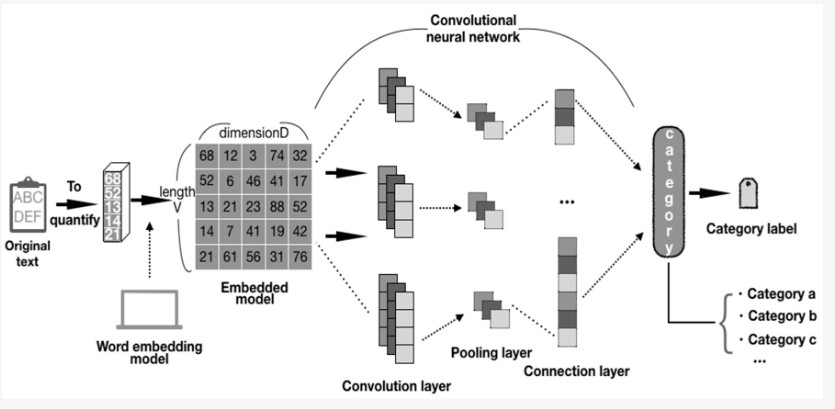

In [ ]:
#!pip install spacy
!pip install contractions


In [ ]:
!pip install opendatasets

In [ ]:
!pip install nltk
import nltk
nltk.download('all')

In [ ]:
# https://www.datacamp.com/tutorial/text-classification-python
#https://www.kaggle.com/code/sugataghosh/e-commerce-text-classification-tf-idf-word2vec
import opendatasets as op
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import spacy
import re
import string
import spacy
import nltk
from textblob import TextBlob
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [ ]:
# Downloads
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english'))

In [ ]:

op.download("https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification")
#bharathidohno
#66f0d6ee443677c5bc1d92ec501a207b

In [ ]:
filepath="/content/ecommerce-text-classification/ecommerceDataset.csv"

In [ ]:

df=pd.read_csv(filepath,names=["label","text"])

In [ ]:
df.head()

In [ ]:
df.iloc[10]

In [ ]:
print(df.columns.tolist())

In [ ]:
df['text'].iloc[0]

In [ ]:
# find unique values in label column.
#['Household' 'Books' 'Clothing & Accessories' 'Electronics']
print(df["label"].unique())

In [ ]:
# Use apply() with a lambda function to create a new column
df['new_label'] = df['label'].apply(
    lambda x: 0 if x == 'Books' else (1 if x == 'Clothing & Accessories' else (2 if x == 'Electronics' else 3))
)

print(df)

In [ ]:
print(df["new_label"].unique())

In [ ]:
df.head()

In [ ]:
df_filtered = df[df['new_label'] == 0]
print(df_filtered)


In [ ]:
df_filtered["text"].iloc[9]

In [ ]:
df_filtered2 = df[df['new_label'] == 2]
print(df_filtered2)

In [ ]:
df_filtered2["text"].iloc[9]

In [ ]:
# find duplicates
isduplicate=df.duplicated()
print(isduplicate)

# count duplicates
print(isduplicate.sum())# 22622 duplicates identified



In [ ]:
# drop duplicates
df=df.drop_duplicates()

In [ ]:
# locate missing values
# print missing values

print(df.isnull().sum())





In [ ]:
# replace missing value with non
df.fillna("non",inplace=True)

In [ ]:
print(df['new_label'].value_counts())


In [ ]:


# Count of each label
label_counts = df['new_label'].value_counts()

# Plot
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Count of Rows per Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Text Cleaning Functions:**
* remove_special_char(text)
Removes all punctuation and special characters, keeping only letters, numbers, and spaces.

* strip_whitespace(text)
Strips leading/trailing spaces and replaces multiple spaces with a single space.

* remove_numbers(text)
Removes all digits from the text.

Remove all special characters
Lowercase all the words
Tokenize
Remove stopwords
Lemmatize

**Stopword Removal:**

* remove_stopwords(text) (using NLTK)
Tokenizes the text and removes common English stopwords (like "the", "is", "in") using the NLTK library.

* remove_stopwords_spacy(text) (using spaCy)
Uses spaCy’s pre-trained language model to identify and remove stopwords more contextually.

In [ ]:
# Function to remove punctuation and special characters
def remove_special_char(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

#Stripping Extra Whitespace
def strip_whitespace(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

#Removing Numbers
def remove_numbers(text):
    cleaned_text = re.sub(r'\d+', '', text)
    return cleaned_text

#stop words - nltk
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered)


# Load the small English model
nlp = spacy.load("en_core_web_sm")

def remove_stopwords_spacy(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return ' '.join(tokens)



**remove_duplicates**(text)
Removes duplicate words from a string while preserving their original order.

**normalize_text**(text)
A full text normalization pipeline that performs:

* Unicode normalization
Removes non-ASCII characters for clean encoding.

* Contraction expansion
Converts "don't" to "do not", "it's" to "it is", using the contractions library.

* Lowercasing
Standardizes text to lowercase for uniformity.

* Punctuation removal
Strips all punctuation using regex.

* Whitespace cleanup
Removes extra or irregular spaces.

* NLP parsing with spaCy:

* Filters out stopwords and non-alphabetic tokens.

* Lemmatizes tokens

* Deduplication
Final step removes repeated words using remove_duplicates().





In [ ]:
# remove duplicates
def remove_duplicates(text):
    seen = set()
    result = []
    for word in text.split():
        if word not in seen:
            seen.add(word)
            result.append(word)
    return ' '.join(result)



def normalize_text(text):
    # Unicode normalization
    text = text.encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Expand contractions
    text = contractions.fix(text)

    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Spelling correction (basic)
    #text = str(TextBlob(text).correct())

    # Tokenization and NLP parsing
    doc = nlp(text)

    tokens = []
    for token in doc:
        if token.text not in stop_words \
           and token.is_alpha \
           and token.pos_ in {'NOUN', 'ADJ', 'VERB'}:
            # Lemmatization
            tokens.append(token.lemma_)

    return remove_duplicates(' '.join(tokens))

In [ ]:
# apply normalise text functions to sample text

sample1=df_filtered2["text"].iloc[9]

print(sample1)

In [ ]:
normalised=normalize_text(sample1)
print(sample1)
print(normalised)

In [ ]:
df["normalised_text"]=df["text"].apply(normalize_text)

In [ ]:
df.head()



In [ ]:
# count number of words in each row in normalised_text column . create new column
df['word_count'] = df['normalised_text'].apply(lambda x: len(x.split()))

df.head()

In [ ]:
# max word_count by lable
average_word_count = df.groupby('label')['word_count'].max()

average_word_count

In [ ]:
# select word_count where label=books
df_books = df[df['label'] == 'Books']['word_count']
df_clothing = df[df['label'] == 'Clothing & Accessories']['word_count']
df_Electronics = df[df['label'] == 'Electronics']['word_count']
df_Household = df[df['label'] == 'Household']['word_count']

In [ ]:
# scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].scatter(df_books, df_books, color='skyblue', edgecolor='black')
axs[0,1].scatter(df_clothing, df_clothing, color='yellow', edgecolor='black')
axs[1,0].scatter(df_Electronics, df_Electronics, color='green', edgecolor='black')
axs[1,1].scatter(df_Household, df_Household, color='pink', edgecolor='black')

axs[0,0].set_title('Books')
axs[0,1].set_title('Clothing & Accessories')
axs[1,0].set_title('Electronics')
axs[1,1].set_title('Household')

plt.tight_layout()

In [ ]:
# violin plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].violinplot(df_books, showmeans=True)
axs[0,1].violinplot(df_clothing, showmeans=True)
axs[1,0].violinplot(df_Electronics, showmeans=True)
axs[1,1].violinplot(df_Household, showmeans=True)

axs[0,0].set_title('Books')
axs[0,1].set_title('Clothing & Accessories')
axs[1,0].set_title('Electronics')
axs[1,1].set_title('Household')

plt.tight_layout()

In [ ]:
# select only normalised_text and new_lable fields
df_new=df[["normalised_text","new_label"]]

In [ ]:
df_new.head()

In [ ]:
df_new

**Tokenization** and Padding:
* Tokenizer: Converts words into integers based on frequency (max_words=1000).

* Sequences: Converts text to sequences of tokens.

* Padding: Ensures all sequences have the same length (max_len=100) for model input.

In [ ]:
# APPLimport pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout



text=df_new["normalised_text"]
labels=df_new["new_label"]

max_words=1000
max_len=100
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)


sequences=tokenizer.texts_to_sequences(text)
X=pad_sequences(sequences,maxlen=max_len)

y = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Convolutional** Neural Network (CNN) for Text Classification
Purpose: The model is designed to classify text into different categories (multi-class classification), such as categorizing e-commerce product reviews.



In [ ]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')  # y.shape[1] gives number of classes
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
output=model.fit(X_train, y_train,
          epochs=5,
          batch_size=64,
          validation_split=0.2)

In [ ]:
# Extract training and validation accuracy and convert to percentage
train_acc = output.history['accuracy'] * 100
val_acc = output.history['val_accuracy'] * 100

print(f"Training Accuracy: {train_acc}")
print(f"Validation Accuracy: {val_acc}")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

In [ ]:

# Generate the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(cm.shape[0]), yticklabels=np.arange(cm.shape[0]))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# Impliment BERT

from transformers import pipeline
from tqdm import tqdm


classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

candidate_labels = ['Household', 'Books' ,'Clothing & Accessories', 'Electronics']

tqdm.pandas()

In [ ]:
df.iloc[19000]

In [ ]:
df_new.iloc[19000]

In [ ]:
sample2=df_new["normalised_text"].iloc[19000]
print(sample2)

In [ ]:

text_classify=sample2

classifier(text_classify,candidate_labels)   # 97% for work



In [ ]:

# Ref:
# https://www.geeksforgeeks.org/text-classification-using-cnn/
# https://cnvrg.io/cnn-sentence-classification/
# https://www.mdpi.com/1999-5903/12/12/228

